## < step3. 전처리 > : 데이터 전처리 함수 사용하기 

In [1]:
#pandas 모듈 import
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#read_csv()함수로 데이터를 DataFrame형태로 불러옵니다.
#read_csv("파일경로를 포함한 파일명",sep="구분자")
file_path='../data/chipotle.tsv' #파일 경로 변수로 설정.
chipo = pd.read_csv(file_path,sep='\t')
chipo['order_id']=chipo['order_id'].astype(str) ##계산에 의미없는 id를 str로변경

print(chipo.shape)##행 렬의 정보를 출력하는 함수.(몇행(행의 이름을 제외하고) 몇열)
print("-----------------------------------------------")
print(chipo.info())##불러온 데이터의 DataFrame 정보

(4622, 5)
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


In [2]:
#chipo라는 데이터 프레임에서 순서대로 (행(rows)기준)10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### aplly와 lambda 함수를 이용한 데이터 전처리

In [3]:
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [4]:
#column 단위 데이터에 apply()함수로 전처리를 적용
#item_price 문자열 타입의 데이터를 수치형으로 전처리
#apply() 함수는 series단위의 연산을 처리하는 기능을 수행하며 ,sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받음
#lambda 뒤에 나오는 인수는 함수에서 사용될 변수 x를 정의하며, 변수를 실수형으로 변환하는 float()함수에 적용시키고 다시 item_price에 대입
chipo['item_price']=chipo['item_price'].apply(lambda x : float(x[1:]))
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

##### float(변수) 함수는 입력받은 변수를 실수형으로 변환시켜준다
##### apply(내용)함수는 series단위에 내용에 대한 함수를 실행한다.

## <step.4 탐색적 분석> 스무고개로 개념적 탐색 분석하기
### 깊이있는 질문을 통해 데이터를 탐색 ex)각 아이템의 가격, 주문당 평균금액, 한 주문에 10달러 이상 구매한 ID 등
#### 주문당 평균 계산금액 출력하기.

주문한 내역당 얼마나 샀고 거기에 대해 평균을 구해줘야 함.

In [5]:
##주문당 이므로 order_id로 그룹생성 item_price 피처에 sum()적용하고 그 sum()뒤에 mean()적용
avr=chipo.groupby('order_id').sum().mean() ##quantity와 item_price모두 출력가능
avr

quantity       2.711014
item_price    18.811429
dtype: float64

##### 주문당 평균 item구매 개수 , 주문당 평균 금액 개수
주문당 평균 금액만 구하려면

In [6]:
price_avr=chipo.groupby('order_id')['item_price'].sum().mean()
price_avrn="%.2f"%price_avr
price_avrn

'18.81'

##### 한 주문에 10달러 이상 지불한 주문번호(id) 출력하기

In [7]:
cog10=chipo.groupby('order_id')["item_price"].sum()
results=cog10[cog10>=10]
print(results)
print(results.index.values)

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64
['1' '10' '100' ... '997' '998' '999']


In [8]:
chipo['order_id']=chipo['order_id'].astype(int) ##계산에 의미없는 id를 str로변경 한것을 다시 int로 변경
cog=chipo.groupby('order_id')["item_price"].sum()
print(cog)

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64


In [9]:
chipo['order_id']=chipo['order_id'].astype(str)
chipo['order_id']=chipo['order_id'].str.zfill(4)##zfill(크기)문자열의 크기를 정하고 빈공간에 0을 채워넣는 함수
cog=chipo.groupby('order_id')['item_price'].sum()
print(cog)
print(cog.index.values)

order_id
0001    11.56
0002    16.98
0003    12.67
0004    21.00
0005    13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64
['0001' '0002' '0003' ... '1832' '1833' '1834']


#### 각 아이템의 가격 구하기
chipo.quantity==1로 1개 구매한 주문을 선별

item_name을 기준으로 gorupby 수행,min()으로 최저가 계산

item_prcie를 기준으로 정렬하는 sort_value()함수 적용

In [10]:
cgi=chipo[chipo.quantity==1]
ppi=cgi.groupby('item_name').min()
ppi=ppi.sort_values(by='item_price',ascending=True)
ppi

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,0017,1,NaN,1.09
Canned Soda,0014,1,[Coca Cola],1.09
Canned Soft Drink,0114,1,[Coke],1.25
Side of Chips,0003,1,NaN,1.69
Chips,0019,1,NaN,1.99
Chips and Fresh Tomato Salsa,0001,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,0130,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,0001,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,0085,1,NaN,2.39


#### 아이템 가격 분포 그래프 출력

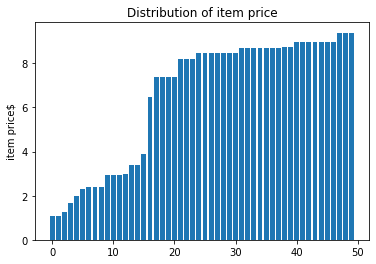

In [11]:
inl=ppi.index.tolist() #뽑아 왔던 ppi를 리스트로 만듬
x_pos=np.arange(len(inl))
y_pos=ppi['item_price'].tolist()
plt.bar(x_pos,y_pos,align='center')
plt.ylabel('item price$')
plt.title('Distribution of item price')
plt.show()

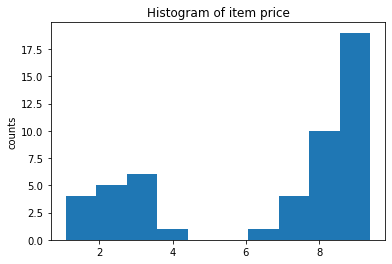

In [12]:
plt.hist(y_pos,align='mid')
plt.ylabel('counts')
plt.title("Histogram of item price")
plt.show()

#### 가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 구하기
id별로 얼마나 주문을 했고 해당 주문에 아이템이 몇개 팔렸는지.

In [13]:
cg=chipo.groupby('order_id')
cg.sum().sort_values(by='item_price',ascending=False)[:5] #오름차순해서 위에서 5개만 출력

,quantity,item_price
order_id,,
0926,23,205.25
1443,35,160.74
1483,14,139.00
0691,11,118.25
1786,20,114.30


#### Veggie Salad Bowl이 몇번 주문되었는지

In [14]:
chipo_salad=chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id'])
chipo_salad
print(len(chipo_salad))
chipo_salad

18


,order_id,quantity,item_name,choice_description,item_price
186,0083,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,0128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,0195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,0207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,0394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,0536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,0760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,0869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,0896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,0913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


##### 'Chicken Bowl'메뉴를 2개이상 주문한 횟수

In [15]:
chipo_chicken=chipo[chipo['item_name']=="Chicken Bowl"]#Chicken_Bowl을 주문한 횟수를 구할수 있음.
print(chipo_chicken)
print(chipo_chicken['quantity'].sum())#Chicken_Bowl이 총 몇개 팔렸는지.
print()
chipo_chicken_result=chipo_chicken[chipo_chicken['quantity']>=2]#한번주문에 2개이상 산 경우만 뽑아옴.
print(len(chipo_chicken_result))
chipo_chicken_result

     order_id  quantity     item_name  \
4        0002         2  Chicken Bowl   
5        0003         1  Chicken Bowl   
13       0007         1  Chicken Bowl   
19       0010         1  Chicken Bowl   
26       0013         1  Chicken Bowl   
...       ...       ...           ...   
4590     1825         1  Chicken Bowl   
4591     1825         1  Chicken Bowl   
4595     1826         1  Chicken Bowl   
4599     1827         1  Chicken Bowl   
4604     1828         1  Chicken Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
19    [Tomatillo Red Chili Salsa, [Fajita Vegetables...        8.75  
26    [Roasted Chili Corn Salsa (Medium), [Pinto Bea...        8.49  
...                                                 ...         ...  
4590  [Roasted Ch

,order_id,quantity,item_name,choice_description,item_price
4,0002,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,0070,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,0124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,0178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,0181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,0271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,0401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,0418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,0457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,0578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50


In [16]:
print(chipo_chicken)
print(len(chipo_chicken))#chipo_chicken을 주문한 횟수
chipo_chicken_ordersum=chipo_chicken.groupby('order_id').sum()['quantity']#같은 아이디가 따로 산경우도 2개이상으로 포함
chipo_chicken_result=chipo_chicken_ordersum[chipo_chicken_ordersum>=2]
print(len(chipo_chicken_result))
chipo_chicken_result


     order_id  quantity     item_name  \
4        0002         2  Chicken Bowl   
5        0003         1  Chicken Bowl   
13       0007         1  Chicken Bowl   
19       0010         1  Chicken Bowl   
26       0013         1  Chicken Bowl   
...       ...       ...           ...   
4590     1825         1  Chicken Bowl   
4591     1825         1  Chicken Bowl   
4595     1826         1  Chicken Bowl   
4599     1827         1  Chicken Bowl   
4604     1828         1  Chicken Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
19    [Tomatillo Red Chili Salsa, [Fajita Vegetables...        8.75  
26    [Roasted Chili Corn Salsa (Medium), [Pinto Bea...        8.49  
...                                                 ...         ...  
4590  [Roasted Ch

order_id
0002    2
0034    2
0070    2
0093    2
0124    3
       ..
1767    2
1771    2
1786    5
1824    2
1825    3
Name: quantity, Length: 114, dtype: int64

#### 주문량이 많은 순대로 정렬

In [17]:
chipoTotal=chipo.groupby('item_name')['quantity'].sum(0)
chipoTotal.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [18]:
chipo_chicken

,order_id,quantity,item_name,choice_description,item_price
4,0002,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,0003,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,0007,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,0010,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,0013,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [25]:
chipo_chicken[chipo_chicken["choice_description"]]

KeyError: "None of [Index(['[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',\n       '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',\n       '[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]',\n       '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettuce]]',\n       '[Roasted Chili Corn Salsa (Medium), [Pinto Beans, Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]',\n       '[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Lettuce]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]',\n       '[Tomatillo Red Chili Salsa, [Rice, Fajita Vegetables, Sour Cream, Lettuce]]',\n       '[Tomatillo Red Chili Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]',\n       ...\n       '[Tomatillo Red Chili Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]',\n       '[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Lettuce]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]',\n       '[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Lettuce, Guacamole]]',\n       '[Tomatillo Red Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce]]',\n       '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]',\n       '[Roasted Chili Corn Salsa, [Cheese, Lettuce]]',\n       '[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]'],\n      dtype='object', length=726)] are in the [columns]"

###### 